In [90]:
import numpy as np 
import pandas as pd 
import datetime
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import gc
%matplotlib inline

In [91]:
train_data = pd.read_csv('../input/train_sample.csv')

In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    251 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


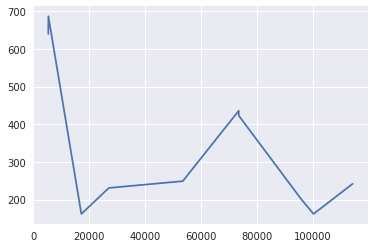

In [93]:
train_data.ip.value_counts()[:10].sort_index().plot()

In [94]:
for col in train_data:
    print (col,'\t',train_data[col].unique().size)

ip 	 34686
app 	 156
device 	 99
os 	 132
channel 	 162
click_time 	 80355
attributed_time 	 252
is_attributed 	 2


In [95]:
train_data.device.unique().size

99

In [96]:
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

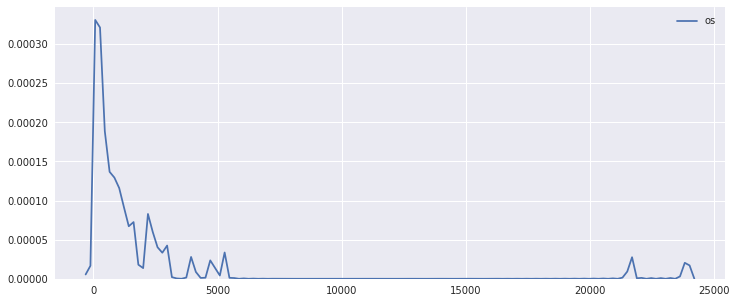

In [97]:
sns.kdeplot(train_data.os.value_counts().sort_index())

In [98]:
train_data.os = train_data.os.astype('str')

**Setting up Garbage Collection**

In [99]:
%del train_data
%gc.collect()

ERROR:root:Line magic function `%del` not found.
ERROR:root:Line magic function `%gc.collect` not found.


**Presetting Data types**

In [100]:
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        }

In [101]:
train_data = pd.read_csv('../input/train_sample.csv', dtype=dtypes)

In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null uint32
app                100000 non-null uint16
device             100000 non-null uint16
os                 100000 non-null uint16
channel            100000 non-null uint16
click_time         100000 non-null object
attributed_time    251 non-null object
is_attributed      100000 non-null uint8
dtypes: object(2), uint16(4), uint32(1), uint8(1)
memory usage: 2.8+ MB


**Selecting #rows of read**

In [103]:
train_data_top_10000 = pd.read_csv('../input/train.csv', nrows=10000, dtype=dtypes)

**Skipping Without Heading**

In [104]:
train = pd.read_csv('../input/train.csv', skiprows=5000000, nrows=1000000, header = None, dtype=dtypes)
train.head()

,0,1,2,3,4,5,6,7
0,37363,12,1,25,245,2017-11-06 20:27:57,NaN,0
1,89913,2,1,9,469,2017-11-06 20:27:57,NaN,0
2,114235,26,1,13,121,2017-11-06 20:27:57,NaN,0
3,18839,3,1,19,442,2017-11-06 20:27:57,NaN,0
4,105580,15,1,13,245,2017-11-06 20:27:57,NaN,0


**Skipping With Heading**

In [105]:
train = pd.read_csv('../input/train.csv', skiprows=range(1, 5000000), nrows=1000000, dtype=dtypes)
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,37363,12,1,25,245,2017-11-06 20:27:57,NaN,0
1,89913,2,1,9,469,2017-11-06 20:27:57,NaN,0
2,114235,26,1,13,121,2017-11-06 20:27:57,NaN,0
3,18839,3,1,19,442,2017-11-06 20:27:57,NaN,0
4,105580,15,1,13,245,2017-11-06 20:27:57,NaN,0


**Random Sampling of Lists From Entire Data Set**

In [106]:
lines = 184903891

In [107]:
skiplines = np.random.choice(np.arange(1, lines), size=lines-1-1000000, replace=False)

In [108]:
skiplines=np.sort(skiplines)

In [109]:
#check our list
print('lines to skip:', len(skiplines))
print('remaining lines in sample:', lines-len(skiplines), '(remember that it includes the heading!)')

###################SANITY CHECK###################
#find lines that weren't skipped by checking difference between each consecutive line
#how many out of first 100000 will be imported into the csv?
diff = skiplines[1:100000]-skiplines[2:100001]
remain = sum(diff!=-1)
print('Ratio of lines from first 100000 lines:',  '{0:.5f}'.format(remain/100000) ) 
print('Ratio imported from all lines:', '{0:.5f}'.format((lines-len(skiplines))/lines) )

lines to skip: 183903890
remaining lines in sample: 1000001 (remember that it includes the heading!)
Ratio of lines from first 100000 lines: 0.00545
Ratio imported from all lines: 0.00541


In [110]:
train = pd.read_csv('../input/train.csv', skiprows=skiplines, dtype=dtypes)
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
1,191846,3,1,20,379,2017-11-06 15:41:52,NaN,0
2,48172,64,1,10,459,2017-11-06 15:54:01,NaN,0
3,14901,20,1,17,259,2017-11-06 16:00:00,NaN,0
4,112179,28,1,1,135,2017-11-06 16:00:01,NaN,0


In [111]:
del skiplines
gc.collect()

411

In [112]:
train.click_time.describe()

count                 1000000
unique                 234049
top       2017-11-07 08:00:13
freq                       18
Name: click_time, dtype: object

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null uint32
app                1000000 non-null uint16
device             1000000 non-null uint16
os                 1000000 non-null uint16
channel            1000000 non-null uint16
click_time         1000000 non-null object
attributed_time    2518 non-null object
is_attributed      1000000 non-null uint8
dtypes: object(2), uint16(4), uint32(1), uint8(1)
memory usage: 27.7+ MB


In [114]:
train['click_time'] = pd.to_datetime(train['click_time'])

In [115]:
train['attributed_time'] = pd.to_datetime(train['attributed_time'])

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null uint32
app                1000000 non-null uint16
device             1000000 non-null uint16
os                 1000000 non-null uint16
channel            1000000 non-null uint16
click_time         1000000 non-null datetime64[ns]
attributed_time    2518 non-null datetime64[ns]
is_attributed      1000000 non-null uint8
dtypes: datetime64[ns](2), uint16(4), uint32(1), uint8(1)
memory usage: 27.7 MB


In [117]:
temp_rows = train.loc[train.is_attributed == 1]

In [118]:
temp_rows.is_attributed.value_counts()

1    2518
Name: is_attributed, dtype: int64

In [119]:
train.is_attributed.value_counts()

0    997482
1      2518
Name: is_attributed, dtype: int64

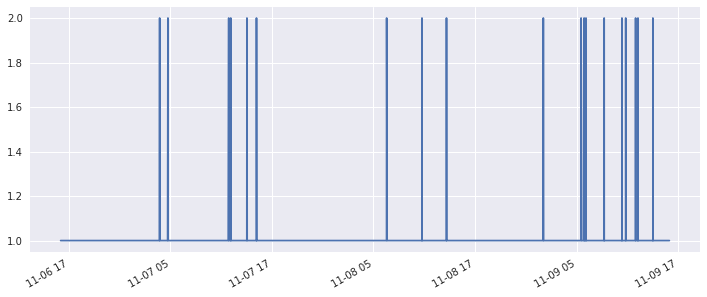

In [120]:
train['attributed_time'].value_counts().sort_index().plot()

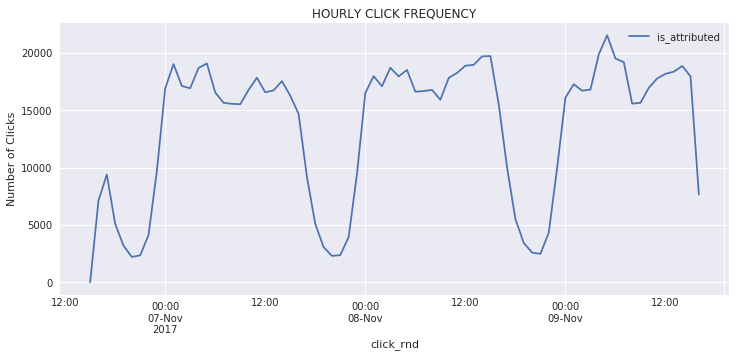

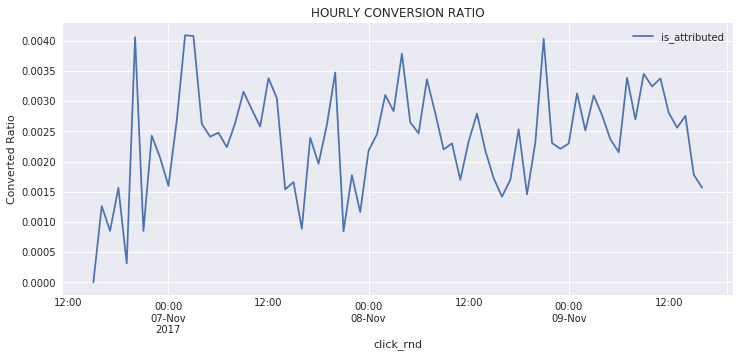

In [121]:
#round the time to nearest hour
train['click_rnd']=train['click_time'].dt.round('H')  

#check for hourly patterns
train[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).count().plot()
plt.title('HOURLY CLICK FREQUENCY');
plt.ylabel('Number of Clicks');

train[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).mean().plot()
plt.title('HOURLY CONVERSION RATIO');
plt.ylabel('Converted Ratio');

**Extracted only rows where `is_attributed` == 1**

In [122]:
empty_df = pd.DataFrame()
chunksize = 10**6

In [123]:
for chunk in pd.read_csv('../input/train.csv', chunksize=chunksize, dtype = dtypes):
    filtered = chunk.loc[chunk.is_attributed == 1]
    empty_df = pd.concat([empty_df, filtered], ignore_index=True)

In [124]:
empty_df.info()
empty_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456846 entries, 0 to 456845
Data columns (total 8 columns):
ip                 456846 non-null uint32
app                456846 non-null uint16
device             456846 non-null uint16
os                 456846 non-null uint16
channel            456846 non-null uint16
click_time         456846 non-null object
attributed_time    456846 non-null object
is_attributed      456846 non-null uint8
dtypes: object(2), uint16(4), uint32(1), uint8(1)
memory usage: 12.6+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
1,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,1
2,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,1
3,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,1
4,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,1


In [125]:
empty_df['click_time'] = pd.to_datetime(empty_df['click_time'])
empty_df['attributed_time'] = pd.to_datetime(empty_df['attributed_time'])

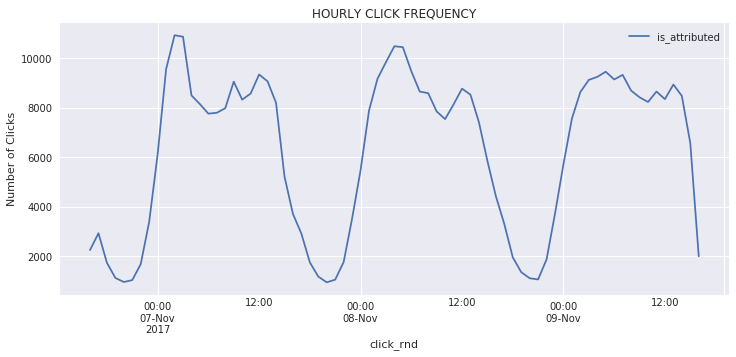

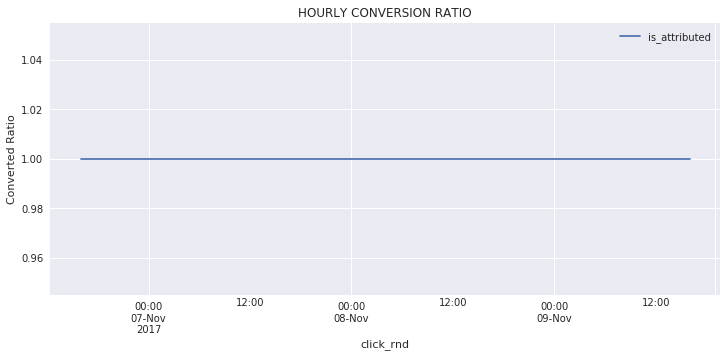

In [126]:
empty_df['click_rnd']=empty_df['click_time'].dt.round('H')  

#check for hourly patterns
empty_df[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).count().plot()
plt.title('HOURLY CLICK FREQUENCY');
plt.ylabel('Number of Clicks');

empty_df[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).mean().plot()
plt.title('HOURLY CONVERSION RATIO');
plt.ylabel('Converted Ratio');

In [127]:
gc.collect()

10975